Список заданий:
1. Описать задачу словами - _сделано_
2. Прочитать данные - _сделано_
3. Визуализировать данные и вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.). Интерпретировать. - _сделано_
4. Обработать пропущенные значения (или убедиться, что их нет) - _сделано_
5. Обработать категориальные признаки - _сделано_
6. Провести нормализацию (или объяснить, почему в вашем случае она не нужна) - _сделано_
7. Разбить данные на обучающую и тестовую выборки - _сделано_
8. Запустить классификатор ближайших соседей (попробовать разное их количество) - _сделано_
9. Вычислить ошибки на обучающей и тестовой выборках. Сделать выводы - _сделано_
10. По желанию: запустить другие классификаторы. Сравнить результаты - _сделано_
11. По желанию: как-то побороться с несбалансированностью классов (если она есть)
12. По желанию: исключить коррелированные переменные (объяснить зачем)
13. Сделать общие выводы - _сделано_


## Описание задачи

Имеется набор данных, содержащий информацию о 2729 ритейлерах, работающих в России. Данные были взяты с российского сайта, который собирает информацию о российской торговой недвижимости и торговых центрах.

Задача классифиации - необходимо определить, к какой ценовой категории относится магазин.

## Загрузка данных

In [367]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn 

In [368]:
data_raw = pd.read_csv("rus_retail.csv", sep=";")
data_raw.shape

(2729, 11)

In [369]:
data_raw.head()

,name,country_origin,domain,price_category,founded,presence_world,presence_russia,presence_regions,description,plans,total_rented_area
0,Бери заряд,Россия,Вендинг,Средний,2018.0,60000.0,250.0,Москва,«Бери Заряд!» первый в России сервис по прокат...,NaN,NaN
1,Levi’s,США,Одежда,Средний,1853.0,56500.0,263.0,Москва; Санкт-Петербург; Екатеринбург; Краснод...,Компания Levi Strauss&Co была основана в XIX в...,NaN,NaN
2,Золотая корона,Россия,"Банк, кредит, заем",Средний,1994.0,49000.0,40000.0,Москва; Санкт-Петербург; Абакан; Азов; Алексан...,«Золотая Корона» — российская платежная систем...,1000.0,NaN
3,Subway,США,"Кафе, ресторан",Ниже среднего,1965.0,44000.0,700.0,Москва; Санкт-Петербург; Ангарск; Астрахань; Б...,Сеть ресторанов SUBWAY была основана в 1965 го...,NaN,NaN
4,Pizza Hut,США,"Кафе, ресторан",Средний,1958.0,34000.0,52.0,Москва; Санкт-Петербург; Казань,Pizza Hut (Пицца Хат)— сеть ресторанов состоящ...,NaN,NaN


In [370]:
data_raw.tail()

,name,country_origin,domain,price_category,founded,presence_world,presence_russia,presence_regions,description,plans,total_rented_area
2724,1001 тур,Россия,"Туризм, путешествия",Средний,2002.0,NaN,327.0,Москва; Санкт-Петербург; Архангельск; Балашиха...,Компания «1001 Тур» работает с 2002 года. Сейч...,NaN,NaN
2725,1000 и одна туфелька,Россия,Товары и услуги для детей,Средний,NaN,NaN,22.0,Санкт-Петербург,«1000 и одна туфелька» - сеть специализированн...,NaN,NaN
2726,1000 и одна сумка,Россия,Аксессуары,Ниже среднего,2003.0,NaN,114.0,Москва; Санкт-Петербург; Анапа; Армавир; Астра...,«1000 и одна сумка» - динамично развивающаяся ...,40.0,NaN
2727,март.15,Россия,Аксессуары,Выше среднего,1998.0,NaN,58.0,Москва; Санкт-Петербург; Волгоград; Воронеж; Е...,Сеть часовых салонов «3-15» является одной из ...,NaN,NaN
2728,"36,6",Россия,Аптека,Средний,1991.0,NaN,239.0,Москва; Санкт-Петербург; Балашиха; Белгород; Б...,"Аптечная сеть «36,6» — национальный лидер розн...",15.0,NaN


Признаки имеют следующие имена и типы:
+ name - имя ритейлера
+ country_origin - страна происхождения
+ domain - специализация (Одежда, Аптека, Аксессуары и т.д.)
+ price_category - ценовая категория (Неизвестно, Ниже среднего, Средний, Выше среднего, Люкс/Премиум)
+ founded - год основания
+ presence_world - количество магазинов по миру
+ presence_russia - количество магазинов в России
+ presence_regions - регионы России, в которых представлены магазины
+ description - описание
+ plans - количество магазинов, которые ритейлер планирует открыть в России
+ total_rented_area - общая арендная площадь

Можно сделать первоначальные выводы о том, что имя магазина и его описание не влияют на его ценовую категорию, так как эти признаки индивидуальны и не имеют содержательной информации.

Имена ячеек:

In [371]:
data_raw.columns

Index(['name', 'country_origin', 'domain', 'price_category', 'founded',
       'presence_world', 'presence_russia', 'presence_regions', 'description',
       'plans', 'total_rented_area'],
      dtype='object')

Имена строк:

In [372]:
data_raw.index

RangeIndex(start=0, stop=2729, step=1)

## Обработка пропущенных значений

Разделим данные на категориальные и количественные

In [373]:
categorical_columns = [c for c in data_raw.columns if data_raw[c].dtype.name == 'object']
numerical_columns   = [c for c in data_raw.columns if data_raw[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['name', 'country_origin', 'domain', 'price_category', 'presence_regions', 'description']
['founded', 'presence_world', 'presence_russia', 'plans', 'total_rented_area']


Исследуем данные на наличие или отсутствие пропущенных значений

In [374]:
data_raw[categorical_columns].count(axis = 0)

name                2729
country_origin      2729
domain              2729
price_category      2729
presence_regions    2675
description         2727
dtype: int64

Пропущенные значения для признака 'presence_regions' заполним самым популярным значением в столбце. 'description' менять не будем из-за причины, указанной выше.

In [375]:
data_raw['presence_regions'] = data_raw['presence_regions'].fillna(data_raw['presence_regions'].describe().top)

In [376]:
data_raw[categorical_columns].count(axis = 0)

name                2729
country_origin      2729
domain              2729
price_category      2729
presence_regions    2729
description         2727
dtype: int64

In [377]:
data_raw[numerical_columns].count(axis = 0)

founded              2533
presence_world       1161
presence_russia      2693
plans                 760
total_rented_area     117
dtype: int64

Пропущенные значения для признаков 'founded', 'presence_russia' и 'plans' заполним медианой. В 'presence_world' положим нули, то есть будет считать, что этого ретейлера нет за пределами России. Признак 'total_rented_area' содержит слишком мало данных, поэтому мы не будем его рассматривать.

In [378]:
data_raw['founded'] = data_raw['founded'].fillna(data_raw['founded'].median(axis = 0), axis = 0)

In [379]:
data_raw['presence_russia'] = data_raw['presence_russia'].fillna(data_raw['presence_russia'].median(axis = 0), axis = 0)

In [380]:
data_raw['plans'] = data_raw['plans'].fillna(data_raw['plans'].median(axis = 0), axis = 0)

In [381]:
data_raw['presence_world'] = data_raw['presence_world'].fillna(0, axis = 0)

In [382]:
data_raw[numerical_columns].count(axis = 0)

founded              2729
presence_world       2729
presence_russia      2729
plans                2729
total_rented_area     117
dtype: int64

### Обработка категориальных значений

Столбцы 'country_origin', 'domain' и 'price_category' содержат категориальные признаки. Необходимо заменить их тип 'Object' на специальный, предназначенный для хранения категориальных значений

In [383]:
data_raw['country_origin'] = data_raw['country_origin'].astype('category')

In [384]:
data_raw['country_origin'].dtype

CategoricalDtype(categories=['Австралия', 'Австрия', 'Беларусь', 'Бельгия',
                  'Великобритания', 'Венгрия', 'Вьетнам', 'Германия', 'Греция',
                  'Грузия', 'Дания', 'Европа', 'Израиль', 'Индия', 'Испания',
                  'Италия', 'Канада', 'Китай', 'Корея', 'Латвия', 'Литва',
                  'Мексика', 'Молдавия', 'Нидерланды', 'Норвегия', 'Польша',
                  'Португалия', 'Россия', 'США', 'Сербия', 'Турция', 'Украина',
                  'Финляндия', 'Франция', 'Чехия', 'Швейцария', 'Швеция',
                  'Шри-Ланка', 'Южная Корея', 'Япония'],
, ordered=False)

In [385]:
data_raw['domain'] = data_raw['domain'].astype('category')

In [386]:
data_raw['domain'].dtype

CategoricalDtype(categories=['Авто и товары для авто', 'Аксессуары', 'Аптека',
                  'Банк, кредит, заем', 'Бытовая техника', 'Вендинг',
                  'Вино и алкогольные напитки', 'Все для дома',
                  'Здоровье, лечение, профилактика', 'Зоотовары и услуги',
                  'Кафе, ресторан', 'Книги и печатные издания',
                  'Компьютеры, комплектующие, аксессуары', 'Красота',
                  'Магазин для Взрослых', 'Мебель', 'Образование / обучение',
                  'Обувь', 'Одежда', 'Оптика', 'Парфюмерия и Косметика',
                  'Продукты питания', 'Развлечения', 'Ремонт и строительство',
                  'Сигары, табак, аксессуары', 'Сладости и Шоколад',
                  'Сотовые телефоны, электроника, фото', 'Спорт',
                  'Ставки и лотереи', 'Сувениры и Подарки',
                  'Товары и услуги для детей', 'Туризм, путешествия',
                  'Услуги для бизнеса (b2b)', 'Услуги населению',
                 

In [387]:
data_raw['price_category'] = data_raw['price_category'].astype('category')

In [388]:
data_raw['price_category'].dtype

CategoricalDtype(categories=['Выше среднего', 'Люкс / Премиум', 'Неизвестно',
                  'Ниже среднего', 'Средний'],
, ordered=False)

## Обновление данных

Удалим признаки 'name', 'description' и 'total_rented_area'. Также удалим признак 'presence_regions', содержащий слишком сложные данные для такого небольшого числа ретейлеров

In [389]:
data = data_raw[['country_origin', 'domain', 'price_category', 'founded', 'presence_world', 'presence_russia', 'plans']]
print(data)

     country_origin                     domain price_category  founded  \
0            Россия                    Вендинг        Средний   2018.0   
1               США                     Одежда        Средний   1853.0   
2            Россия         Банк, кредит, заем        Средний   1994.0   
3               США             Кафе, ресторан  Ниже среднего   1965.0   
4               США             Кафе, ресторан        Средний   1958.0   
...             ...                        ...            ...      ...   
2724         Россия        Туризм, путешествия        Средний   2002.0   
2725         Россия  Товары и услуги для детей        Средний   2002.0   
2726         Россия                 Аксессуары  Ниже среднего   2003.0   
2727         Россия                 Аксессуары  Выше среднего   1998.0   
2728         Россия                     Аптека        Средний   1991.0   

      presence_world  presence_russia   plans  
0            60000.0            250.0    10.0  
1            56

### Визуализация и описательная статистика

Сводная информация для количественных признаков

In [390]:
data.describe()

,founded,presence_world,presence_russia,plans
count,2729.000000,2729.000000,2729.000000,2729.000000
mean,1997.990106,213.818615,169.857091,25.752290
std,26.153483,2320.716137,1838.101472,248.510738
min,1300.000000,0.000000,1.000000,1.000000
25%,1996.000000,0.000000,9.000000,10.000000
50%,2002.000000,0.000000,21.000000,10.000000
75%,2009.000000,15.000000,62.000000,10.000000
max,2020.000000,60000.000000,60000.000000,10000.000000


Сводная информация для категориальных признаков

In [391]:
data_raw.describe(include = ['category'])

,country_origin,domain,price_category
count,2729,2729,2729
unique,40,39,5
top,Россия,Одежда,Средний
freq,2324,387,1879


Построим диаграмму рассеивания для признаков 'price_category' и всех остальных признаков

Text(0, 0.5, 'price_category')

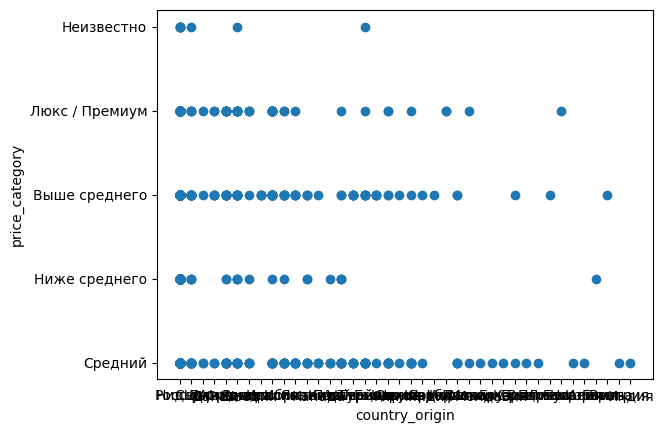

In [392]:
plt.scatter(data['country_origin'], data['price_category'])
plt.xlabel('country_origin')
plt.ylabel('price_category')

Text(0, 0.5, 'price_category')

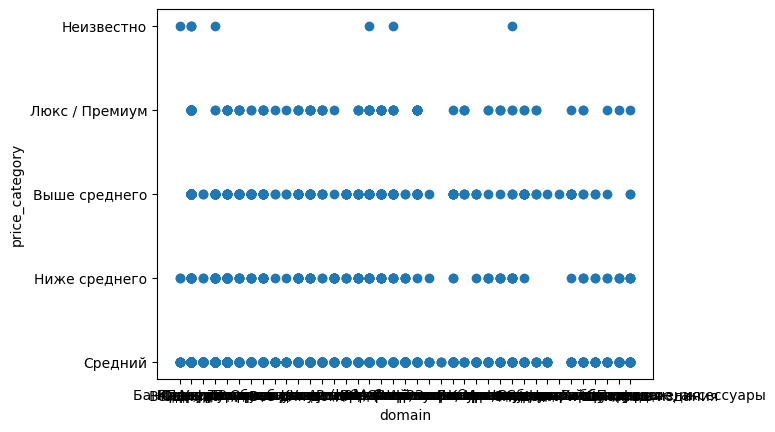

In [393]:
plt.scatter(data['domain'], data['price_category'])
plt.xlabel('domain')
plt.ylabel('price_category')

Text(0, 0.5, 'price_category')

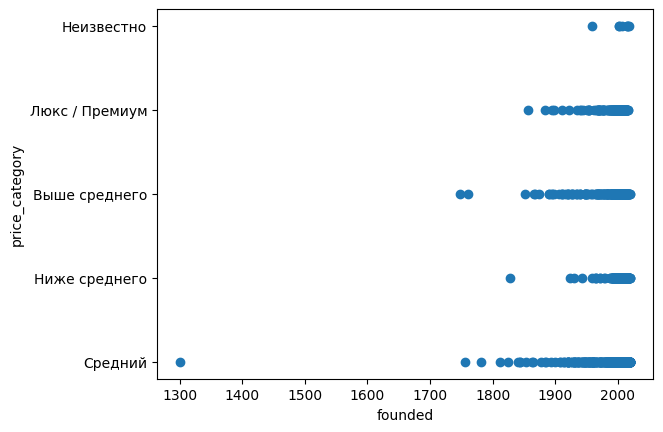

In [394]:
plt.scatter(data['founded'], data['price_category'])
plt.xlabel('founded')
plt.ylabel('price_category')

Text(0, 0.5, 'price_category')

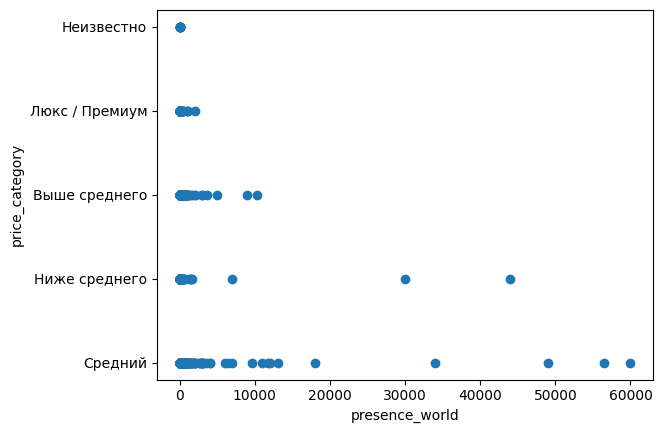

In [395]:
plt.scatter(data['presence_world'], data['price_category'])
plt.xlabel('presence_world')
plt.ylabel('price_category')

Text(0, 0.5, 'price_category')

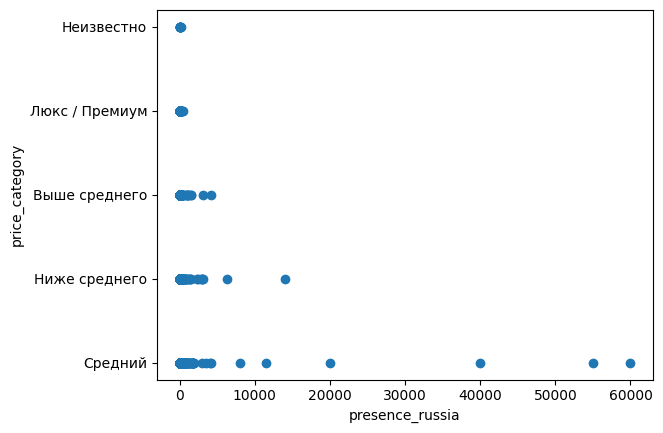

In [396]:
plt.scatter(data['presence_russia'], data['price_category'])
plt.xlabel('presence_russia')
plt.ylabel('price_category')

Text(0, 0.5, 'price_category')

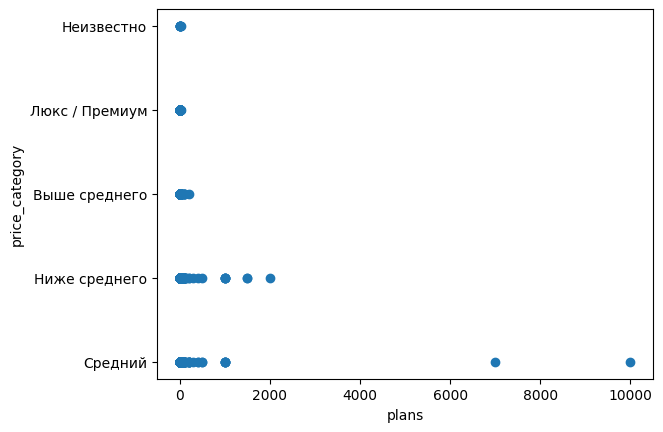

In [397]:
plt.scatter(data['plans'], data['price_category'])
plt.xlabel('plans')
plt.ylabel('price_category')

Мы видим странное значение признака 'founded', равное 1300, и грандиазные планы ретейлеров на открытие >6000 торговых точек, которые следует удалить. Также исследуем на выбросы признаки 'presence_world' и 'presence_russia' и избавимся от выбросов, если они имеются

In [398]:
data['presence_world'].quantile([0.005,0.01,.05,0.1,0.5,0.9,0.95,0.99,0.995])

0.005       0.0
0.010       0.0
0.050       0.0
0.100       0.0
0.500       0.0
0.900     100.0
0.950     400.0
0.990    3000.0
0.995    7720.0
Name: presence_world, dtype: float64

In [399]:
data['presence_russia'].quantile([0.005,0.01,.05,0.1,0.5,0.9,0.95,0.99,0.995])

0.005       1.0
0.010       2.0
0.050       3.0
0.100       4.0
0.500      21.0
0.900     181.4
0.950     368.2
0.990    1607.2
0.995    3036.0
Name: presence_russia, dtype: float64

Как мы видим, 99% всех значений этого признака находится в диапазоне от 1 до 3036. Удалим все строки в таблице, в которых 'presence_russia' выходит за пределы, а также строки, в которых 'founded' = 1300 и 'plans' = 10000:

In [400]:
rows_to_drop = data[(data['founded'] == 1300) | (data['plans'] > 6000) | (data['presence_russia']  < data['presence_russia'].quantile(0.005)) | (data['presence_russia']  > data['presence_russia'].quantile(0.995))].index
data = data.drop(rows_to_drop)
data.shape

(2713, 7)

Вычислим матрицу корреляции

In [401]:
corr_mat = data.corr()
corr_mat

/var/folders/82/8skpw2ds04b3mfj_gzyz_qhc0000gp/T/ipykernel_29901/2083231324.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = data.corr()


,founded,presence_world,presence_russia,plans
founded,1.000000,-0.141395,-0.025510,0.033686
presence_world,-0.141395,1.000000,0.084813,-0.001365
presence_russia,-0.025510,0.084813,1.000000,0.257431
plans,0.033686,-0.001365,0.257431,1.000000


<AxesSubplot: >

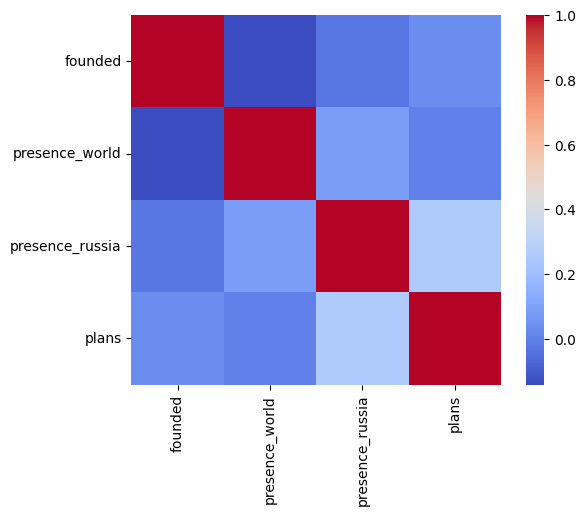

In [402]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')

По матрице корреляции мы не наблюдаем достаточно больших значений, чтобы сделать вывод о том, что эти признаки взаимосвязаны.

## Бинаризация категориальных признаков

Мы имеем 3 категориальных признака: 'country_origin', 'domain' и 'price_category'.

Вместо признака 'country_origin' будем использовать новые признаки 'Австралия', 'Австрия', 'Беларусь', 'Бельгия', 'Великобритания', 'Венгрия', 'Вьетнам', 'Германия', 'Греция', 'Грузия', 'Дания', 'Европа', 'Израиль', 'Индия', 'Испания', 'Италия', 'Канада', 'Китай', 'Корея', 'Латвия', 'Литва', 'Мексика', 'Молдавия', 'Нидерланды', 'Норвегия', 'Польша', 'Португалия', 'Россия', 'США', 'Сербия', 'Турция', 'Украина', 'Финляндия', 'Франция', 'Чехия', 'Швейцария', 'Швеция', 'Шри-Ланка', 'Южная Корея', 'Япония'

In [403]:
country_origin_dummies = pd.get_dummies(data['country_origin'])
country_origin_dummies.head()

,Австралия,Австрия,Беларусь,Бельгия,Великобритания,Венгрия,Вьетнам,Германия,Греция,Грузия,...,Турция,Украина,Финляндия,Франция,Чехия,Швейцария,Швеция,Шри-Ланка,Южная Корея,Япония
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Вместо признака 'domain' будем использовать новые признаки 'Авто и товары для авто', 'Аксессуары', 'Аптека', 'Банк, кредит, заем', 'Бытовая техника', 'Вендинг', 'Вино и алкогольные напитки', 'Все для дома', 'Здоровье, лечение, профилактика', 'Зоотовары и услуги', 'Кафе, ресторан', 'Книги и печатные издания', 'Компьютеры, комплектующие, аксессуары', 'Красота', 'Магазин для Взрослых', 'Мебель', 'Образование / обучение', 'Обувь', 'Одежда', 'Оптика', 'Парфюмерия и Косметика', 'Продукты питания', 'Развлечения', 'Ремонт и строительство', 'Сигары, табак, аксессуары', 'Сладости и Шоколад', 'Сотовые телефоны, электроника, фото', 'Спорт', 'Ставки и лотереи', 'Сувениры и Подарки', 'Товары и услуги для детей', 'Туризм, путешествия', 'Услуги для бизнеса (b2b)', 'Услуги населению', 'Хобби и увлечения', 'Цветы и растения', 'Чай, кофе, аксессуары', 'Шоколадный бутик', 'Ювелирные магазины'

In [404]:
domain_dummies = pd.get_dummies(data['domain'])
domain_dummies.head()

,Авто и товары для авто,Аксессуары,Аптека,"Банк, кредит, заем",Бытовая техника,Вендинг,Вино и алкогольные напитки,Все для дома,"Здоровье, лечение, профилактика",Зоотовары и услуги,...,Сувениры и Подарки,Товары и услуги для детей,"Туризм, путешествия",Услуги для бизнеса (b2b),Услуги населению,Хобби и увлечения,Цветы и растения,"Чай, кофе, аксессуары",Шоколадный бутик,Ювелирные магазины
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Вместо строковых значений признака 'price_category' будем использовать числовые:
+ 0 - 'Неизвестно',
+ 1 - 'Ниже среднего',
+ 2 - 'Средний',
+ 3 - 'Выше среднего', 
+ 4 - 'Люкс / Премиум'

In [405]:
data['price_category'] = data['price_category'].astype('object')

data.loc[(data['price_category'] == 'Неизвестно'), 'price_category'] = 0
data.loc[(data['price_category'] == 'Ниже среднего'), 'price_category'] = 1
data.loc[(data['price_category'] == 'Средний'), 'price_category'] = 2
data.loc[(data['price_category'] == 'Выше среднего'), 'price_category'] = 3
data.loc[(data['price_category'] == 'Люкс / Премиум'), 'price_category'] = 4

Добавим эти dummy-столбцы к таблице и удалим столбцы 'country_origin', 'domain' и 'price_category'

In [406]:
data = pd.concat((data, domain_dummies), axis = 1)
data = pd.concat((data, country_origin_dummies), axis = 1)

data = data.drop(['country_origin', 'domain'], axis = 1)
data.head()

,price_category,founded,presence_world,presence_russia,plans,Авто и товары для авто,Аксессуары,Аптека,"Банк, кредит, заем",Бытовая техника,...,Турция,Украина,Финляндия,Франция,Чехия,Швейцария,Швеция,Шри-Ланка,Южная Корея,Япония
0,2,2018.0,60000.0,250.0,10.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1853.0,56500.0,263.0,10.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1965.0,44000.0,700.0,10.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1958.0,34000.0,52.0,10.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,1990.0,30000.0,553.0,10.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Нормализация количественных признаков

Для нормализации количественных признаков приведём каждый такой признак к нулевому среднему и единичному среднеквадратичному отклонению

In [407]:
numerical_columns = [c for c in data.columns if data[c].dtype.name != 'object']
data_norm = data[numerical_columns]
data_norm.describe()

,founded,presence_world,presence_russia,plans,Авто и товары для авто,Аксессуары,Аптека,"Банк, кредит, заем",Бытовая техника,Вендинг,...,Турция,Украина,Финляндия,Франция,Чехия,Швейцария,Швеция,Шри-Ланка,Южная Корея,Япония
count,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,...,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000
mean,1998.234427,195.728345,83.419462,18.709915,0.015112,0.028013,0.020641,0.026170,0.010689,0.003686,...,0.006266,0.002212,0.002949,0.011795,0.000737,0.001843,0.003317,0.000737,0.000737,0.003317
std,22.539435,2129.633159,223.426264,82.125989,0.122023,0.165041,0.142207,0.159671,0.102854,0.060611,...,0.078925,0.046984,0.054232,0.107983,0.027146,0.042898,0.057512,0.027146,0.027146,0.057512
min,1748.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1996.000000,0.000000,8.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2002.000000,0.000000,21.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2009.000000,15.000000,60.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2020.000000,60000.000000,3000.000000,2000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [408]:
data_norm = (data - data_norm.mean(axis = 0))/data_norm.std(axis = 0)

In [409]:
data_norm.describe()

,founded,plans,presence_russia,presence_world,Австралия,Австрия,Авто и товары для авто,Аксессуары,Аптека,"Банк, кредит, заем",...,Цветы и растения,"Чай, кофе, аксессуары",Чехия,Швейцария,Швеция,Шоколадный бутик,Шри-Ланка,Ювелирные магазины,Южная Корея,Япония
count,2.713000e+03,2.713000e+03,2.713000e+03,2713.000000,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,...,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,2.713000e+03,2713.000000,2713.000000,2.713000e+03,2713.000000,2.713000e+03
mean,1.110469e-15,1.571418e-17,2.749981e-17,0.000000,7.857089e-18,2.095224e-17,-3.404739e-17,-7.857089e-18,-1.309515e-17,2.095224e-17,...,7.857089e-18,4.583302e-18,6.547574e-18,-1.047612e-17,4.976156e-17,0.000000,0.000000,3.666641e-17,0.000000,3.928544e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000,1.000000e+00
min,-1.110207e+01,-2.156433e-01,-3.688889e-01,-0.091907,-3.841895e-02,-6.081307e-02,-1.238493e-01,-1.697351e-01,-1.451504e-01,-1.639014e-01,...,-7.939341e-02,-6.664204e-02,-2.715627e-02,-4.296162e-02,-5.768167e-02,-0.019199,-0.027156,-1.590972e-01,-0.027156,-5.768167e-02
25%,-9.913411e-02,-1.060555e-01,-3.375586e-01,-0.091907,-3.841895e-02,-6.081307e-02,-1.238493e-01,-1.697351e-01,-1.451504e-01,-1.639014e-01,...,-7.939341e-02,-6.664204e-02,-2.715627e-02,-4.296162e-02,-5.768167e-02,-0.019199,-0.027156,-1.590972e-01,-0.027156,-5.768167e-02
50%,1.670660e-01,-1.060555e-01,-2.793739e-01,-0.091907,-3.841895e-02,-6.081307e-02,-1.238493e-01,-1.697351e-01,-1.451504e-01,-1.639014e-01,...,-7.939341e-02,-6.664204e-02,-2.715627e-02,-4.296162e-02,-5.768167e-02,-0.019199,-0.027156,-1.590972e-01,-0.027156,-5.768167e-02
75%,4.776328e-01,-1.060555e-01,-1.048196e-01,-0.084864,-3.841895e-02,-6.081307e-02,-1.238493e-01,-1.697351e-01,-1.451504e-01,-1.639014e-01,...,-7.939341e-02,-6.664204e-02,-2.715627e-02,-4.296162e-02,-5.768167e-02,-0.019199,-0.027156,-1.590972e-01,-0.027156,-5.768167e-02
max,9.656663e-01,2.412501e+01,1.305388e+01,28.081959,2.601923e+01,1.643777e+01,8.071351e+00,5.889362e+00,6.886867e+00,6.098980e+00,...,1.259086e+01,1.500001e+01,3.681033e+01,2.326801e+01,1.733014e+01,52.067268,36.810330,6.283151e+00,36.810330,1.733014e+01


## Обучающая и тестовая выборка

In [418]:
X = data.drop('price_category', axis = 1)
y = data['price_category']
feature_names = X.columns

In [411]:
feature_names

Index(['founded', 'presence_world', 'presence_russia', 'plans',
       'Авто и товары для авто', 'Аксессуары', 'Аптека', 'Банк, кредит, заем',
       'Бытовая техника', 'Вендинг', 'Вино и алкогольные напитки',
       'Все для дома', 'Здоровье, лечение, профилактика', 'Зоотовары и услуги',
       'Кафе, ресторан', 'Книги и печатные издания',
       'Компьютеры, комплектующие, аксессуары', 'Красота',
       'Магазин для Взрослых', 'Мебель', 'Образование / обучение', 'Обувь',
       'Одежда', 'Оптика', 'Парфюмерия и Косметика', 'Продукты питания',
       'Развлечения', 'Ремонт и строительство', 'Сигары, табак, аксессуары',
       'Сладости и Шоколад', 'Сотовые телефоны, электроника, фото', 'Спорт',
       'Ставки и лотереи', 'Сувениры и Подарки', 'Товары и услуги для детей',
       'Туризм, путешествия', 'Услуги для бизнеса (b2b)', 'Услуги населению',
       'Хобби и увлечения', 'Цветы и растения', 'Чай, кофе, аксессуары',
       'Шоколадный бутик', 'Ювелирные магазины', 'Австралия', 'Авс

In [419]:
X = X.to_numpy()
type(X)

numpy.ndarray

In [421]:
y = np.array(y, dtype='int')
y

array([2, 2, 1, ..., 1, 3, 2])

In [422]:
type(y)

numpy.ndarray

In [423]:
print(X.shape)
print(y.shape)
N, d = X.shape

(2713, 83)
(2713,)


In [424]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape
N_test, _ = X_test.shape

print(N_train, N_test)

1899 814


## k ближайших соседей (kNN)

In [425]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [426]:
knn

KNeighborsClassifier(n_neighbors=10)

In [427]:
y_test_predict = knn.predict(X_test)
err_test = np.mean(y_test != y_test_predict)

In [428]:
err_test

0.32186732186732187

Подберём наилучшее количество ближайших соседей

In [434]:
from sklearn.model_selection import GridSearchCV

nnb = [1, 3, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=7)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.3106918043970355 30


In [435]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test = np.mean(y_test != knn.predict(X_test))

print(err_train, err_test)

0.31121642969984203 0.3083538083538084


Вывод: для данного датасета метод k ближайших соседей работает не очень хорошо, ошибка составляет около 30%

## SVC

In [436]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)

0.23696682464454977 0.3083538083538084


Подберём параметры

In [437]:
from sklearn.model_selection import GridSearchCV
Cs = 10.**np.arange(-5, 5)
gamma_array = 10.**np.arange(-5, 5)
svc = SVC(gamma='auto')
grid = GridSearchCV(svc, cv=3, param_grid = {'C': Cs, 'gamma': gamma_array})
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_C = grid.best_estimator_.C
print(best_cv_err, best_C)

0.310163243812533 1.0


In [438]:
svc = SVC(C = best_C, gamma='auto').fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.31121642969984203 0.3083538083538084


Вывод: при использовании машины опорных векторов ошибка не уменьшилась

## Random Forest

In [440]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.0026329647182727752 0.33415233415233414


Значимость признаков

In [441]:
np.sum(rf.feature_importances_)

1.0

In [442]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(d):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))   

Feature ranking:
 1. feature 'presence_russia' (0.270616)
 2. feature 'founded' (0.240887)
 3. feature 'presence_world' (0.118347)
 4. feature 'plans' (0.077834)
 5. feature 'Россия' (0.020649)
 6. feature 'Одежда' (0.018201)
 7. feature 'Ювелирные магазины' (0.011845)
 8. feature 'Продукты питания' (0.011339)
 9. feature 'Кафе, ресторан' (0.010834)
10. feature 'Аксессуары' (0.009952)
11. feature 'Обувь' (0.009666)
12. feature 'Мебель' (0.009221)
13. feature 'Италия' (0.009051)
14. feature 'Красота' (0.008608)
15. feature 'Все для дома' (0.008083)
16. feature 'Товары и услуги для детей' (0.007499)
17. feature 'Парфюмерия и Косметика' (0.007442)
18. feature 'Спорт' (0.007409)
19. feature 'Аптека' (0.006880)
20. feature 'Услуги населению' (0.006555)
21. feature 'Германия' (0.005945)
22. feature '  США' (0.005885)
23. feature 'Оптика' (0.005829)
24. feature 'Ремонт и строительство' (0.005455)
25. feature 'Развлечения' (0.005397)
26. feature 'Сотовые телефоны, электроника, фото' (0.005004)

In [443]:
feature_names[[1, 0, 1]]

Index(['presence_world', 'founded', 'presence_world'], dtype='object')

(-1.0, 20.0)

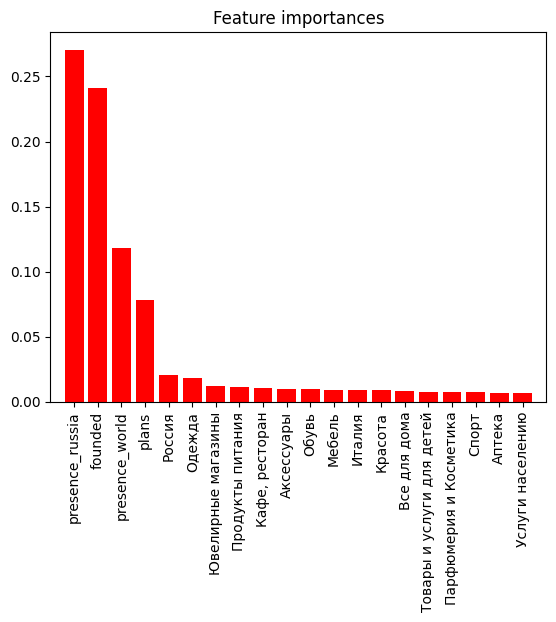

In [444]:
d_first = 20
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align = 'center', color = 'r')
plt.xticks(range(d_first), feature_names[indices[:d_first]], rotation = 90)
plt.xlim([-1, d_first])

Признаки 'presence_russia', 'founded', 'presence_world' и 'plans' игрют решающую роль. Все остльаные признаки не приностят значимого вклада

## Extremely Randomized Trees

In [445]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(err_train, err_test)

0.0026329647182727752 0.36855036855036855


## AdaBoost

In [446]:
ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(err_train, err_test)

0.8172722485518694 0.8538083538083538


## GBT

In [447]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(err_train, err_test)

0.03317535545023697 0.35626535626535627


## Удалим нерешающие признаки и ещё раз попробуем kNN

In [452]:
new_X = pd.concat((data['presence_russia'], data['presence_world'], data['founded'], data['plans']), axis = 1)

In [453]:
new_X = new_X.to_numpy()

In [455]:
print(new_X.shape)
print(y.shape)
N, d = new_X.shape

(2713, 4)
(2713,)


In [456]:
X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

1899 814


In [462]:
nnb = [1, 3, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


0.3106906154274576 20


In [463]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.3122696155871511 0.3058968058968059


## Вывод

Как мы видим, с помощью методов, представленных выше, нельзя предугадать ценовую категорию магазина по тому, сколько магазинов открыто в России и в мире и в каком году с ошибкой, меньше чем 30%